In [25]:
import matplotlib.pyplot as plt
import mplhep as hep
from coffea.util import load
import hist
import numpy as np
hep.style.use("CMS")
from hist.intervals import ratio_uncertainty
from hist.plot import plot_ratio_array


In [20]:
years = ["UL16preVFP","UL16postVFP","UL17", "UL18"]
file_dir = "/afs/desy.de/user/a/albrechs/xxl/af-cms/UHH2/10_6_28/CMSSW_10_6_28/src/UHH2/JetMass/python/coffea_hists/control_plots"
hists = {year:load(f"{file_dir}/templates_{year}.coffea") for year in years}
hists_pnet = {year:load(f"{file_dir}/templates_{year}_particlenet.coffea") for year in years}
#hists_old = {year:load(f"{file_dir}/old_lepid_24-05-23/templates_{year}.coffea") for year in years}

In [4]:
#hists_old_pnet = {year:load(f"{file_dir}/old_lepid_24-05-23/templates_{year}_particlenet.coffea") for year in years}

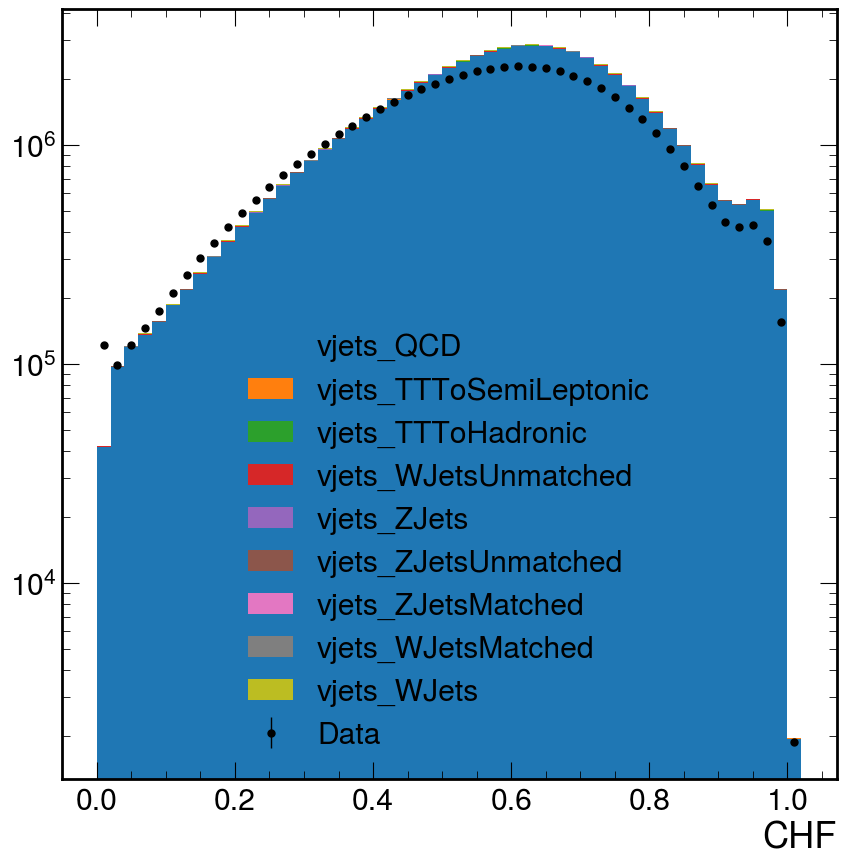

In [3]:
f,ax = plt.subplots()
datasets = [k for k in hists["UL18"]["chf"].axes[0] if "vjets" in k]
datasets.remove("vjets_Data")
mc=[hists["UL18"]["chf"][{"dataset":dataset}] for dataset in datasets]
hep.histplot(mc,label=datasets, ax=ax, stack=True, histtype="fill")
hep.histplot(hists["UL18"]["chf"][{"dataset":"vjets_Data"}],ax=ax,label="Data",histtype="errorbar", color='k')
ax.set_yscale("log")
ax.legend()

In [21]:
datasets

['vjets_QCD',
 'vjets_TTToSemiLeptonic',
 'vjets_TTToHadronic',
 'vjets_WJetsUnmatched',
 'vjets_ZJets',
 'vjets_ZJetsUnmatched',
 'vjets_ZJetsMatched',
 'vjets_WJetsMatched',
 'vjets_WJets']

In [23]:
hists["UL18"]["n2ddt"][{"dataset":datasets, **hist_id}][{"dataset":sum}]

Hist(Regular(51, -2, 2, name='n2ddt', label='$N_{2}^{\\mathrm{DDT}}$'), storage=Weight()) # Sum: WeightedSum(value=6.4166e+07, variance=3.08792e+08)

/nfs/dust/cms/user/albrechs/python/coffea/lib/python3.9/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(
/tmp/ipykernel_23012/3643019875.py:36: RuntimeWarning: invalid value encountered in true_divide
  rsumw = np.nan_to_num(sumw_num / sumw_denom)
/nfs/dust/cms/user/albrechs/python/coffea/lib/python3.9/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(
/nfs/dust/cms/user/albrechs/python/coffea/lib/python3.9/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(
/nfs/dust/cms/user/albrechs/python/coffea/lib/python3.9/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in 

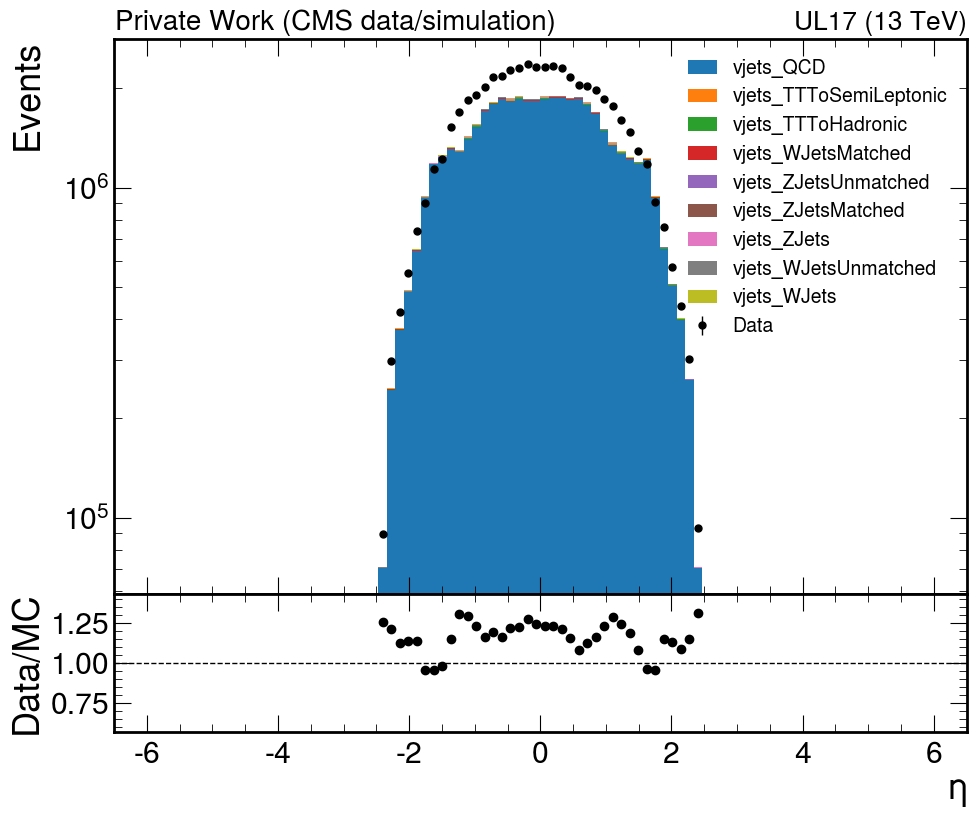

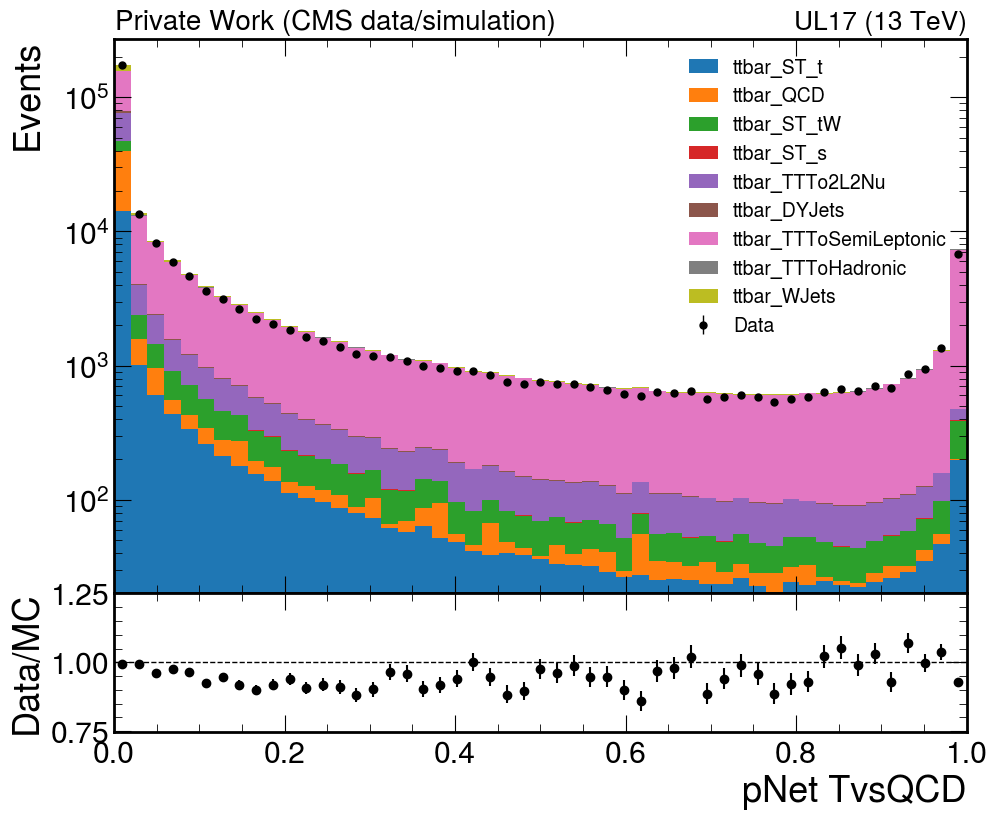

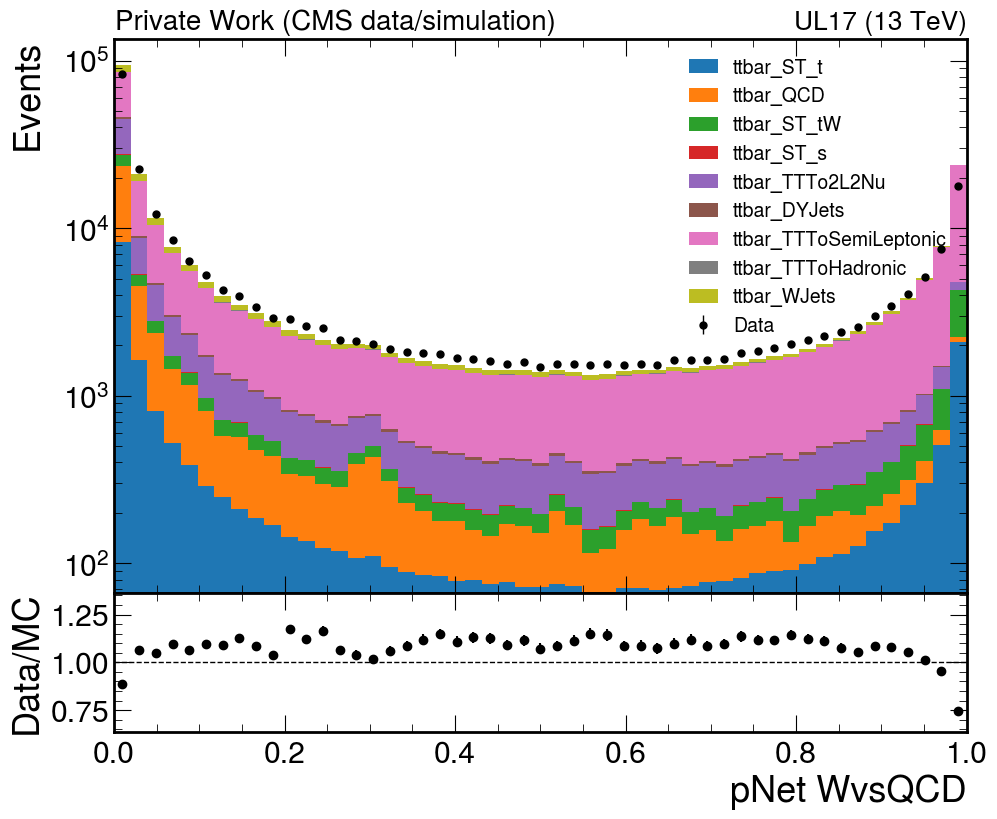

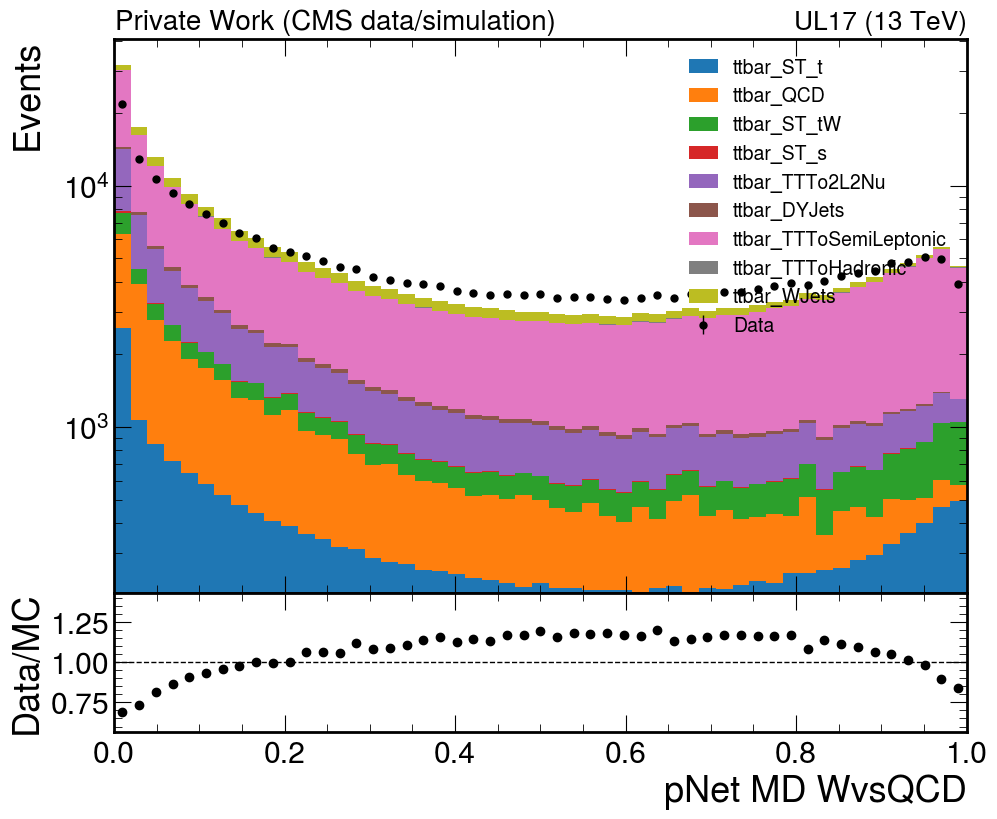

In [54]:
def plot_hist_stacked(hist_name, hist_id,year,ratio=True,logY=False, selection="vjets", rebin=1, bin_slice=slice(0,-1), xrange=(None,None)):
    fig = plt.figure(figsize=(11, 9))
    grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[1, 1 - 9 / 12])
    ax = fig.add_subplot(grid[0])
    rax = fig.add_subplot(grid[1], sharex=ax)
    plt.setp(ax.get_xticklabels(), visible=False)

    dataset_ax = [hax for hax in hists[year][hist_name].axes if hax.name == "dataset"][0]
    datasets = [k for k in dataset_ax if selection in k]
    datasets.remove(f"{selection}_Data")
    if selection == "ttbar":
        to_remove = [ds for ds in datasets if "ttbar_TTToSemiLeptonic_" in ds]
        for ds in to_remove:
            datasets.remove(ds)
    mc=[hists[year][hist_name][{"dataset":dataset, **hist_id}] for dataset in datasets]
    hep.histplot(mc,label=datasets, ax=ax, stack=True, histtype="fill")
    h_mc = hists[year][hist_name][{"dataset":datasets, **hist_id}][{"dataset":sum}]
    h_data = hists["UL18"][hist_name][{"dataset":f"{selection}_Data",**hist_id}]
    hep.histplot(h_data,ax=ax,label="Data",histtype="errorbar", color='k')
    y_half = ax.get_ylim()[1] / 2
    if logY:
        ax.set_yscale("log")
        ymin, ymax = np.log10(ax.get_ylim())
        y_half = 10 ** ((ymin + ymax) / 2)

    hep.label.exp_label(
        llabel="Private Work (CMS %s)" % ("data/simulation"),
        year=year,
        ax=ax,
        fontsize=20,
    )

    ax.legend(loc="upper right", fontsize=14)
    sumw_num = h_data.values()
    sumw_denom = h_mc.values()
    rsumw = np.nan_to_num(sumw_num / sumw_denom)
    rsumw_err = np.nan_to_num(ratio_uncertainty(sumw_num, sumw_denom))
    
    plot_ratio_array(h_data, rsumw, rsumw_err, rax)

    # rax.set_ylim(0.8, 1.2)
    rax.set_ylabel("Data/MC", loc="center")
    fig.align_ylabels()
    ax.set_xlim(*xrange)
    ax.set_ylabel("Events")

year = "UL17"
hist_id = {"jecAppliedOn":"pt&mJ"}
# plot_hist_stacked("n2ddt", hist_id, "UL18", logY=False, xrange=(-0.5, 1.0))    
hist_id = {"jecAppliedOn":"pt"}
# plot_hist_stacked("pt", hist_id, year, logY=True)    
plot_hist_stacked("eta", {}, year, logY=True)
hist_id={}
selection="ttbar"
plot_hist_stacked("pNet_TvsQCD", hist_id, year, logY=True, xrange=(0,1), selection=selection)    
plot_hist_stacked("pNet_WvsQCD", hist_id, year, logY=True, xrange=(0,1), selection=selection)    
plot_hist_stacked("pNet_MD_WvsQCD", hist_id, year, logY=True, xrange=(0,1), selection=selection)    


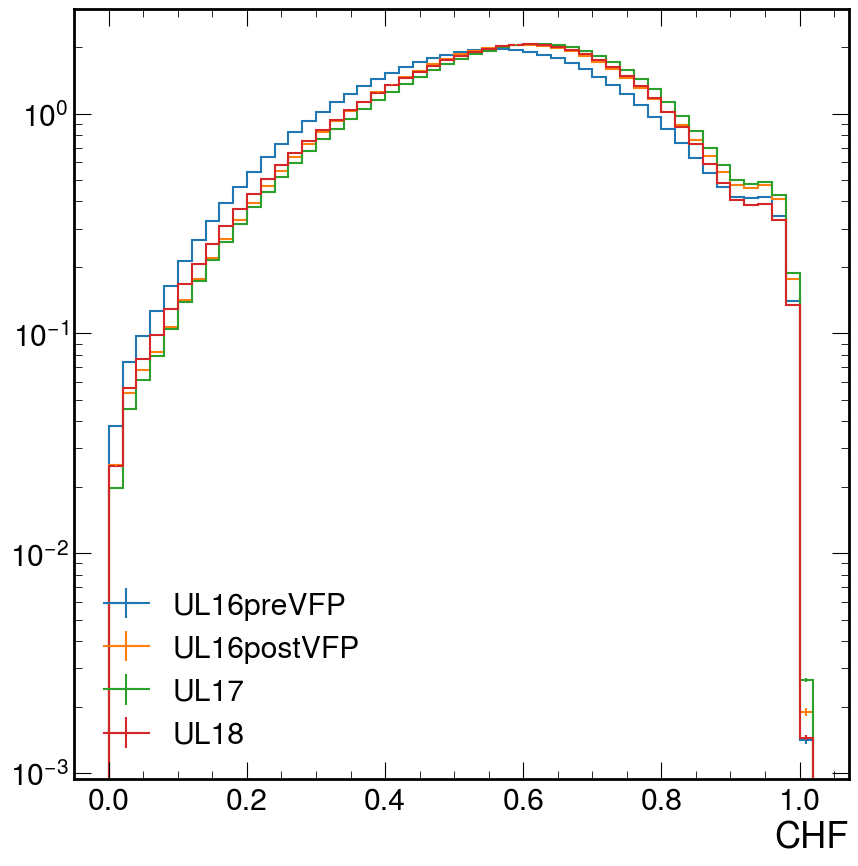

In [5]:
f,ax = plt.subplots()
for year in years:
    hep.histplot(hists[year]["vjets_chf_inclusive"][{"dataset":"vjets_Data","pt":sum}],ax=ax,label=year,density=True)
ax.legend()
ax.set_yscale("log")


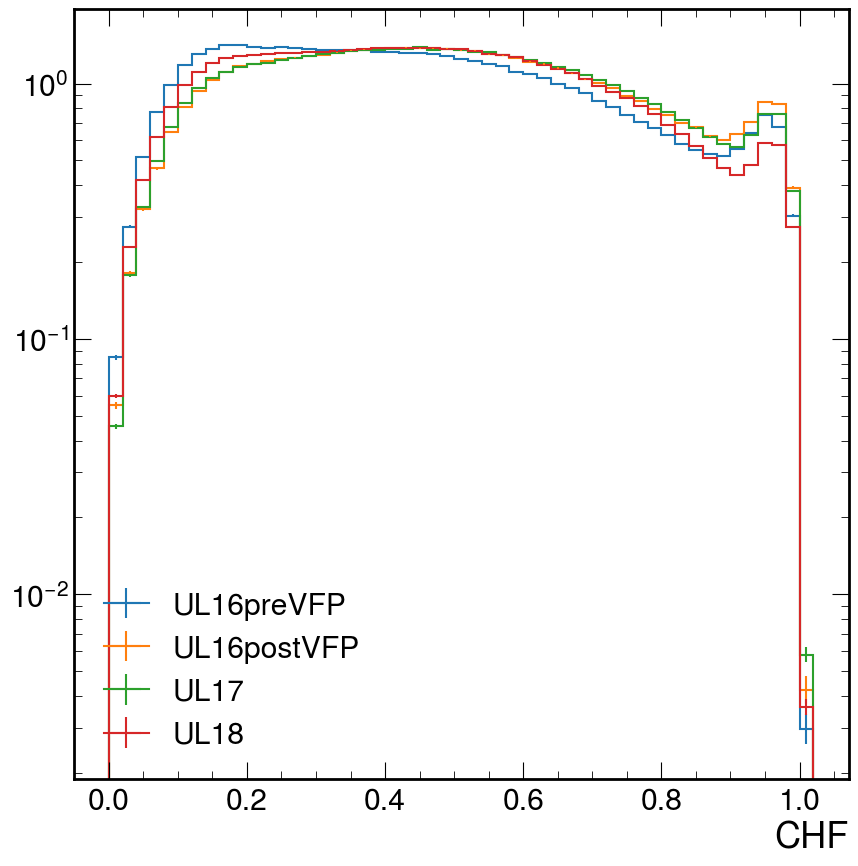

In [6]:
f,ax = plt.subplots()
for year in years:
    hep.histplot(hists[year]["vjets_chf_pass"][{"dataset":"vjets_Data","pt":sum}],ax=ax,label=year,density=True)
ax.legend()
ax.set_yscale("log")


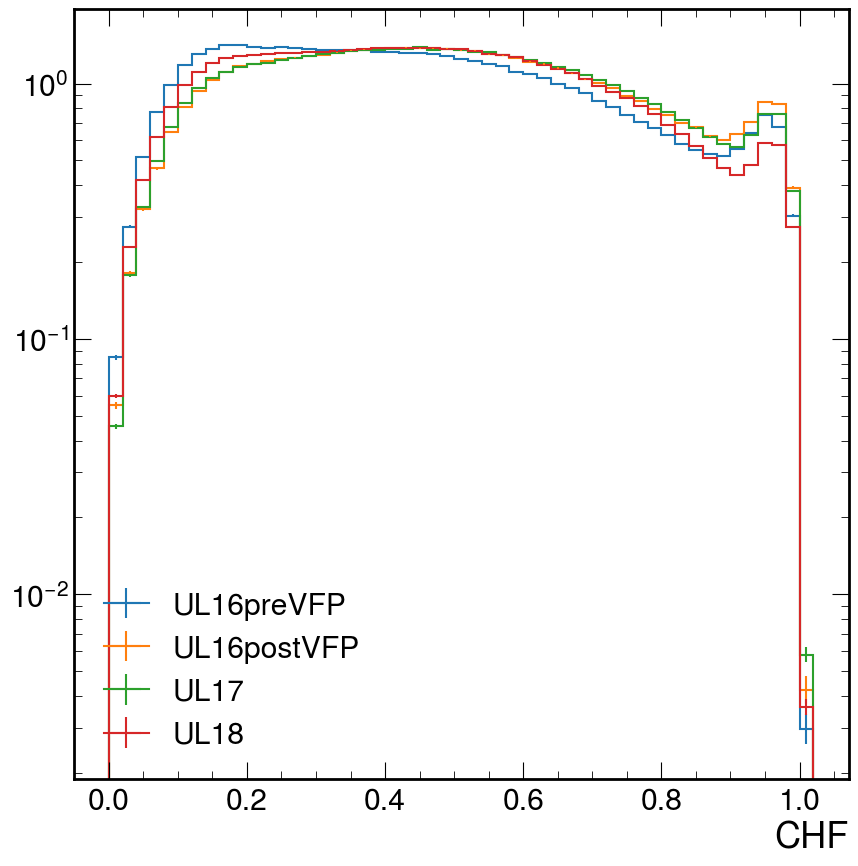

In [62]:
f,ax = plt.subplots()
for year in years:
    hep.histplot(hists[year]["vjets_chf_pass"][{"dataset":"vjets_Data","pt":sum}],ax=ax,label=year,density=True)
ax.legend()
ax.set_yscale("log")


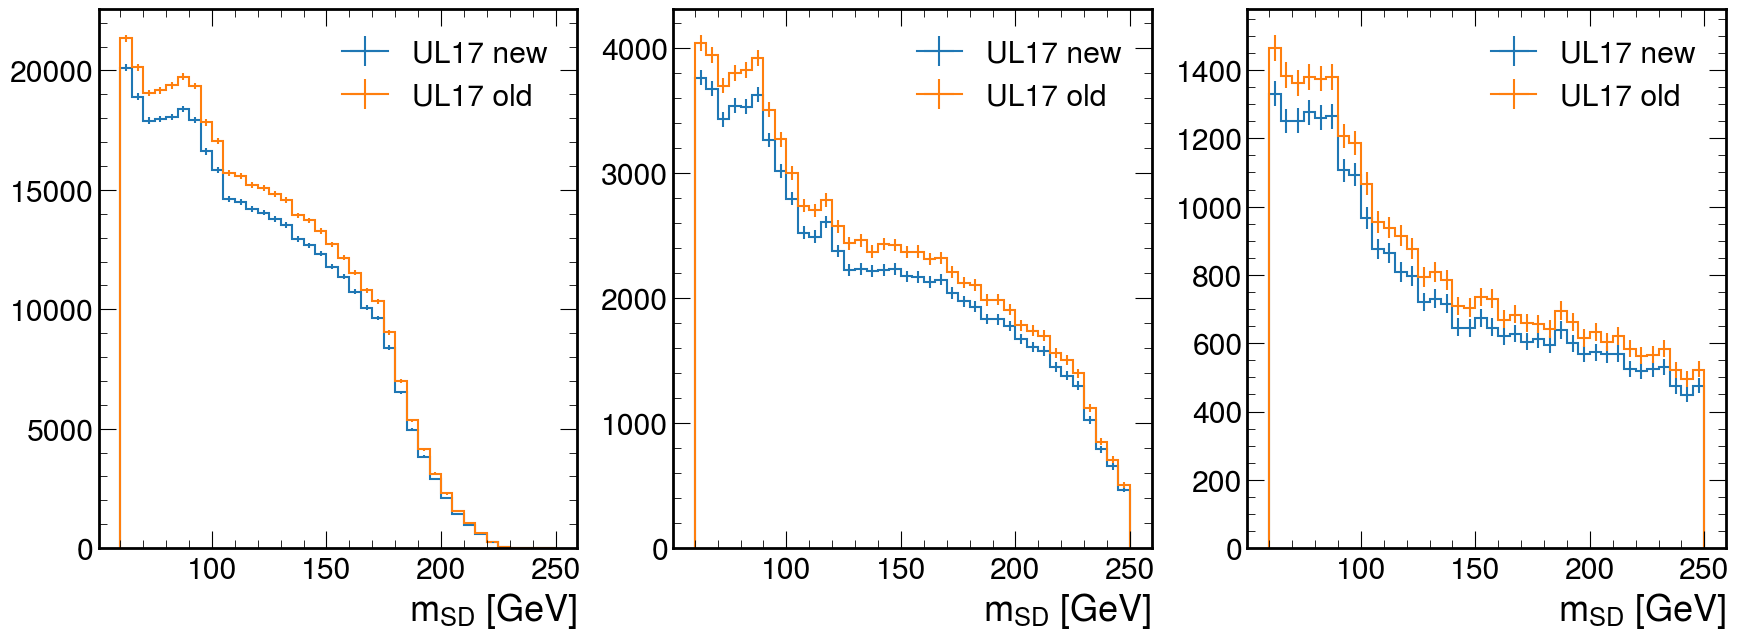

In [67]:
f,ax = plt.subplots(1,3,figsize=(21,7))
pt_bins = ["$500~\mathrm{GeV} \leq p_T < 650~\mathrm{GeV}$", "$650~\mathrm{GeV} \leq p_T < 800~\mathrm{GeV}$", "$800~\mathrm{GeV} \leq p_T < 1200~\mathrm{GeV}$"]
sample="vjets_Data"
#sample="vjets_WJetsMatched"

varname="mjet"
for i in range(3):
    hist_id = {"dataset":sample,"pt":i}
    hist_id.update({"jecAppliedOn":"pt&mJ","abs_eta_regions":sum})
    for year in years[2:3]:
        hep.histplot(hists_pnet[year][f"vjets_{varname}_pass"][hist_id][60:250][hist.rebin(5)],ax=ax[i],label=year+" new",density=False)
        hep.histplot(hists_old_pnet[year][f"vjets_{varname}_pass"][hist_id][60:250][hist.rebin(5)],ax=ax[i],label=year+" old",density=False)
    ax[i].legend()
    #ax[i].text(0.3,10**-1, pt_bins[i],fontsize=15)
    #ax[i].set_yscale("log")
    #ax[i].set_xlim(70,100)
    #ax[i].set_ylim(0.001,0.003)

In [37]:
hists[year][f"vjets_{varname}_pass"][hist_id][50:300]

Hist(Regular(250, 50, 300, name='mJ', label='$m_{SD}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=42773, variance=42773) (WeightedSum(value=161805, variance=161805) with flow)

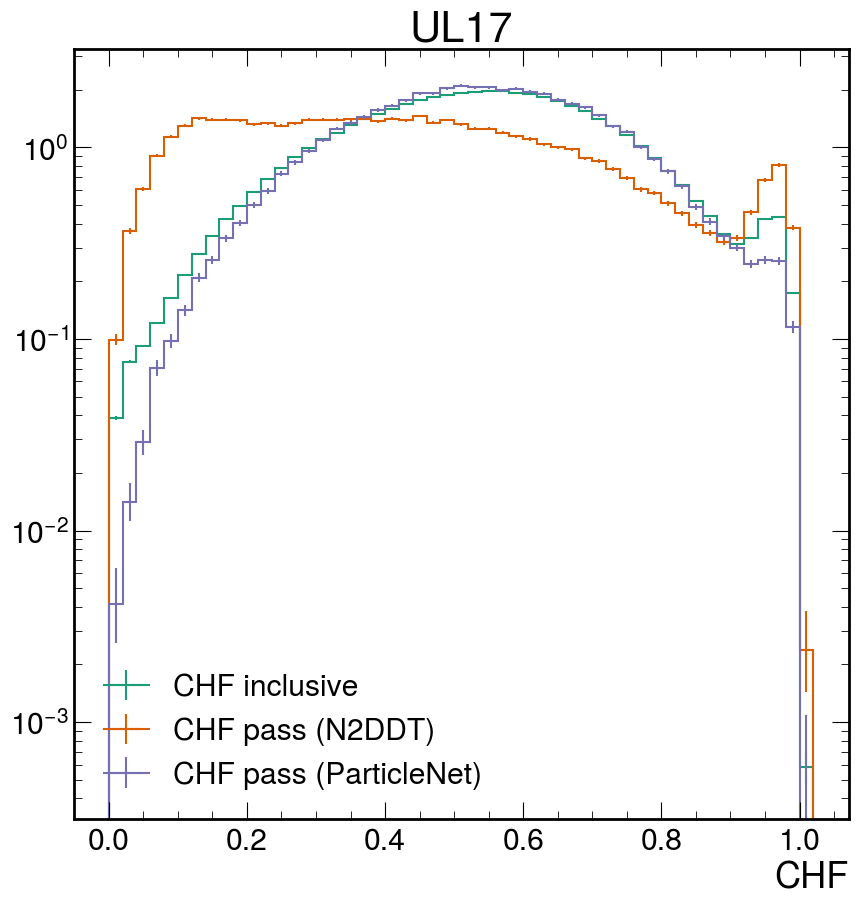

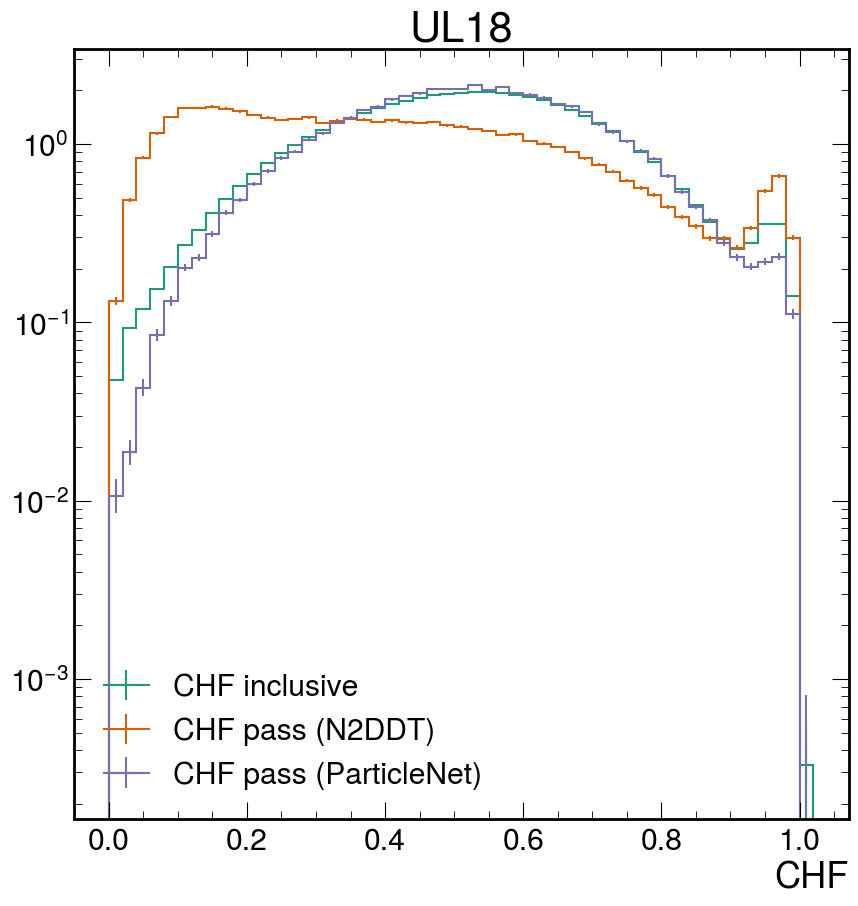

In [57]:
colors = [
    "#1b9e77",
    "#d95f02",
    "#7570b3",
]
sample = "vjets_Data"
#sample = "vjets_WJetsMatched"
varname="chf"
pt=2
for year in ["UL17","UL18"]:
    f,ax = plt.subplots()
    hep.histplot(hists[year][f"vjets_{varname}_inclusive"][{"dataset":sample,"pt":pt}],ax=ax,label=f"{varname.upper()} inclusive ",density=True, color=colors[0])
    hep.histplot(hists[year][f"vjets_{varname}_pass"][{"dataset":sample,"pt":pt}],ax=ax,label=f"{varname.upper()} pass (N2DDT)",density=True, color=colors[1])
    hep.histplot(hists_pnet[year][f"vjets_{varname}_pass"][{"dataset":sample,"pt":pt}],ax=ax,label=f"{varname.upper()} pass (ParticleNet)",density=True, color=colors[2])
    ax.set_title(year)
    ax.set_yscale("log")
    ax.legend()

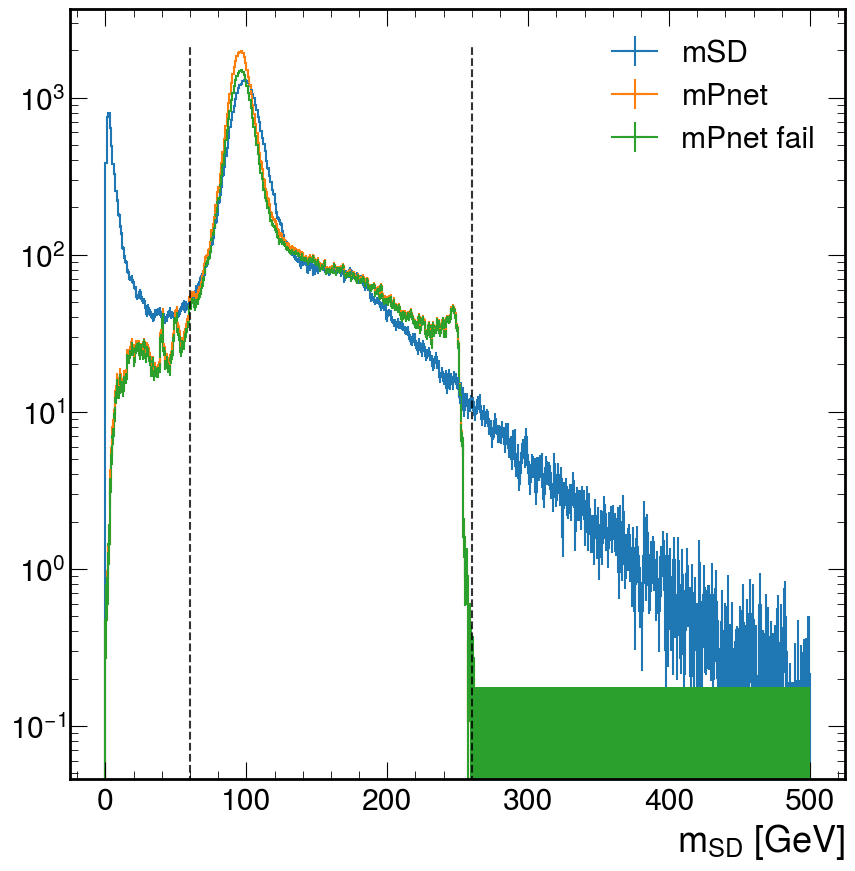

In [58]:
f,ax = plt.subplots()
region = "inclusive"
#region = "pass"
#sample="vjets_Data"
sample="vjets_ZJetsMatched"
#sample="vjets_QCD"
#sample="vjets_TTToSemiLeptonic"
ipt=sum
year = "UL18"
hep.histplot(hists[year][f"vjets_mjet_{region}"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt&mJ","abs_eta_regions":sum}][hist.rebin(1)], label="mSD")
#hep.histplot(hists[year][f"vjets_mjet_0_0_all_variation_{region}__up"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt&mJ","abs_eta_regions":sum}][hist.rebin(5)], label="mSD up")
#hep.histplot(hists[year][f"vjets_mjet_0_0_all_variation_{region}__down"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt&mJ","abs_eta_regions":sum}][hist.rebin(5)], label="mSD down")
hep.histplot(hists[year][f"vjets_mPnet_{region}"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt","abs_eta_regions":sum}][hist.rebin(1)], label="mPnet")
hep.histplot(hists[year][f"vjets_mPnet_fail"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt","abs_eta_regions":sum}][hist.rebin(1)], label="mPnet fail")
#hep.histplot(hists[year][f"vjets_mPnet_0_0_all_variation_{region}__up"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt","abs_eta_regions":sum}][hist.rebin(5)], label="mPnet up")
#hep.histplot(hists[year][f"vjets_mPnet_0_0_all_variation_{region}__down"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt","abs_eta_regions":sum}][hist.rebin(5)], label="mPnet down")
ax.legend()

ax.plot([60.]*2,ax.get_ylim(),"k--",alpha=0.8)
ax.plot([260.]*2,ax.get_ylim(),"k--",alpha=0.8)

#ax.set_xlim(50,250)
#ax.set_ylim(0,20000)
ax.set_yscale("log")

Text(0, 1, 'Events')

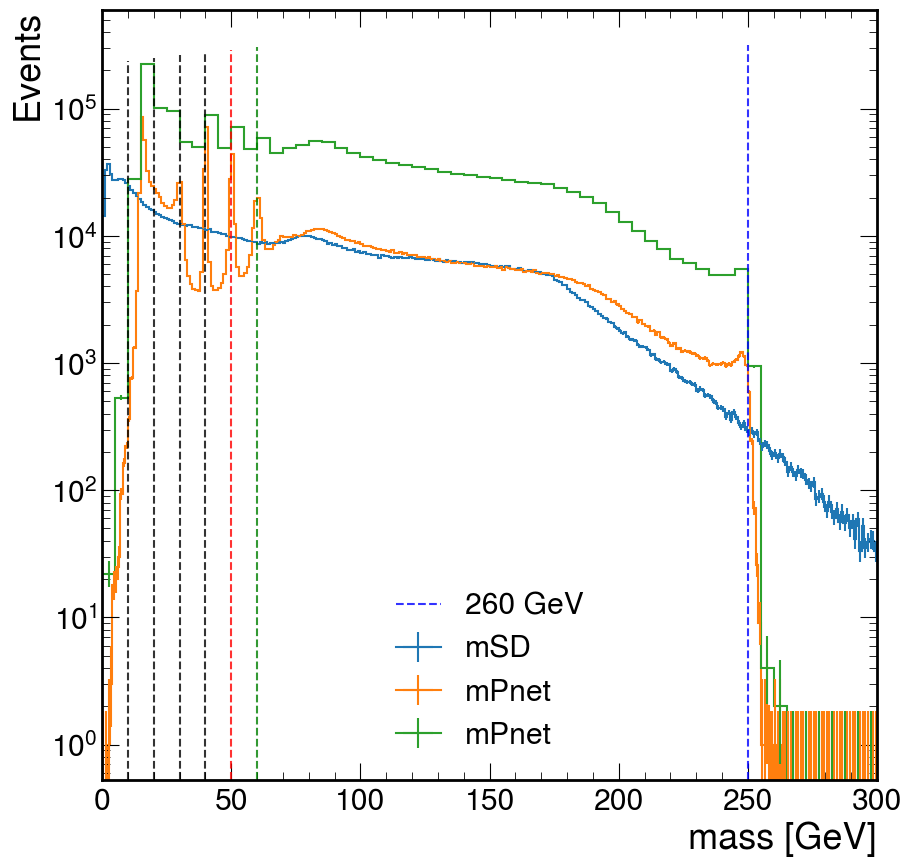

In [60]:
f,ax = plt.subplots()
#region = "inclusive"
region = "pass"
sample="vjets_Data"
#sample="vjets_WJetsMatched"
#sample="vjets_TTToSemiLeptonic"
ipt=sum
hep.histplot(hists["UL18"][f"vjets_mjet_{region}"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt","abs_eta_regions":sum}][hist.rebin(1)], label="mSD")
hep.histplot(hists["UL18"][f"vjets_mPnet_{region}"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt","abs_eta_regions":sum}][hist.rebin(1)], label="mPnet")
hep.histplot(hists["UL18"][f"vjets_mPnet_{region}"][{"dataset":sample,"pt":ipt,"jecAppliedOn":"pt","abs_eta_regions":sum}][hist.rebin(5)], label="mPnet")
#ax.plot([55.]*2,ax.get_ylim(),"k--",alpha=0.8)
ax.plot([10.]*2,ax.get_ylim(),"k--",alpha=0.8)
ax.plot([20.]*2,ax.get_ylim(),"k--",alpha=0.8)
ax.plot([30.]*2,ax.get_ylim(),"k--",alpha=0.8)
ax.plot([40.]*2,ax.get_ylim(),"k--",alpha=0.8)
ax.plot([50.]*2,ax.get_ylim(),"r--",alpha=0.8)
ax.plot([60.]*2,ax.get_ylim(),"g--",alpha=0.8)
ax.plot([250.]*2,ax.get_ylim(),"b--",alpha=0.8, label = "260 GeV")#
ax.set_xlim(0,300)
#ax.set_ylim(0,20000)
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("mass [GeV]")
ax.set_ylabel("Events")
#f.savefig("msd_vs_mPnet.pdf")

In [54]:
import sys
all_paths = list(sys.path)
for p in all_paths:
    if "2.7" in p:
        sys.path.remove(p)
import uproot
import hist
import numpy as np
from hist.intervals import ratio_uncertainty
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")
from scipy.special import erf
from scipy.optimize import curve_fit

In [324]:
def get_eff_hists(h, varname, ref_trig, probe_trig, **kwargs):
    rebin_factor = kwargs.pop("rebin_factor", 1.0)
    lookup_str = kwargs.pop("lookup_str", "")
    prescale_str = kwargs.pop("prescale_str", "")
    variation=kwargs.pop("variation", "nominal")
    common_hist_name = f"{varname}_{ref_trig}_{probe_trig}" + lookup_str
    h_ref = h[f"HLTEffHists/{common_hist_name}_denom"].to_hist()[hist.rebin(rebin_factor)]
    probe_hist_name = (
        f"{common_hist_name}{prescale_str}_num"
    )
    h_probe = h[f"HLTEffHists/{probe_hist_name}"].to_hist()[
        hist.rebin(rebin_factor)
    ]
    if variation != "nominal":
        direction = -1.0 if variation == "down" else 1.0
        h_ref = h_ref + direction*np.sqrt(h_ref.variances())
        h_probe = h_probe + direction*np.sqrt(h_probe.variances())
        
    sumw_num = h_probe.values()
    sumw_denom = h_ref.values()
    rsumw = np.nan_to_num(np.divide(sumw_num, sumw_denom, out=np.zeros_like(sumw_num), where=sumw_denom != 0))
    try:
        rsumw_err = np.nan_to_num(ratio_uncertainty(sumw_num, sumw_denom, "efficiency"))
    except ValueError as e:
        rsumw_err = 0.0
        print("denominator is larger than numerator.")
        print("Probably the denominator was filled with prescales as weight")
        print("setting errors to zero.")
        print(e)

    return h_ref, h_probe, rsumw, rsumw_err


In [414]:
year = "UL17"
# year = "UL16preVFP"


In [ ]:
re.search("AK8PFJet500"

In [403]:
import re

In [422]:
def plot_scalefactor(year):
    h_data = uproot.open(f"/nfs/dust/cms/user/albrechs/UHH2/JetMassOutput/ttbarTrees/ForTriggerEff/Data_{year}.root")
    h_mc = uproot.open(f"/nfs/dust/cms/user/albrechs/UHH2/JetMassOutput/ttbarTrees/ForTriggerEff/QCD_{year}.root")
    f,ax = plt.subplots(figsize=(9, 9))
    colors = [
    "#66c2a5",
    "#fc8d62",
    "#8da0cb",
    "#e78ac3",
    "#a6d854",
    ]
    icolor = 0
    varname = "AK8_PT"
    xlabel="$p_{T,AK8}$"

    triggers = {
        "IsoMuonReference":[
            "AK8PFJet400",
            "AK8PFJet450",
            "AK8PFJet500",
            "AK8PFJet550",
            # "PFHT900",
            # "PFHT1050",
        ],
    }
    ref_trig = "IsoMuonReference"
    probe_trig="AK8PFJet500"
    prescale_str = ""
    lookup_str = "_lookup"
    rebin_factor=5

    def fit_func(z,a=0.5,b=0.5,c=400,d=0.1):
        # return a*erf((z-c)*d)+b
        #"[0]*([1]+0.5*(1-[1])*(1+TMath::Erfc((x-[2])/[3])))"
        return a*(b+0.5*(1-b)*(1+erf((z-c)/d)))
    def fit_erf(x_,y_, fit_range=(None, None)):
        x = deepcopy(x_)
        y=deepcopy(y_)
        p0 = (1., 0., 500.,40.)
        if fit_range[0] is not None:
            y=y[x>=fit_range[0]]
            x = x[x>=fit_range[0]]
        if fit_range[1] is not None:
            y=y[x<fit_range[1]]
            x = x[x<fit_range[1]]
        popt, pcov = curve_fit(fit_func, x, y, maxfev=8000, p0=p0)#, bounds=([0.99,0,300,0],[1,0.04,900,200]))
        
        return popt, pcov
    pt_thr_match = re.search( r"[0-9]{3}",probe_trig)
    pt_thr = 550 if not pt_thr_match else int(pt_thr_match.group())
    x_min=pt_thr-100
    x_max=pt_thr+150
    # x_min=0
    # x_max=1500
    variations=["nominal", "up", "down"]
    eff_data = {var:get_eff_hists(h_data, varname, ref_trig, probe_trig, rebin_factor=rebin_factor, lookup_str=lookup_str, prescale_str=prescale_str, variation=var) for var in variations}
    eff_mc = {var:get_eff_hists(h_mc, varname, ref_trig, probe_trig, rebin_factor=rebin_factor, lookup_str=lookup_str, prescale_str=prescale_str, variation=var) for var in variations}
    eff_fits = {k:{} for k in variations}
    sf_curves = {}
    fit_parameter={}
    x_plot = np.linspace(x_min,x_max,1000)
    for var in variations:
        # alpha = 1.0 if var == "nominal" else 0.2
        # if var == "nominal":
        #     alpha=1.0
        ax.errorbar(eff_data[var][0].axes[0].centers,eff_data[var][2], yerr=eff_data[var][3], label=f"data ({var})",color="tab:red",linestyle="",marker=".", alpha=alpha)
        ax.errorbar(eff_mc[var][0].axes[0].centers,eff_mc[var][2], yerr=eff_mc[var][3], label=f"mc ({var})",color="tab:blue",linestyle="",marker="x", alpha=alpha)


        popt_data,_ = fit_erf(eff_data[var][0].axes[0].centers,eff_data[var][2], fit_range=(0,1000))
        popt_mc,_ = fit_erf(eff_mc[var][0].axes[0].centers,eff_mc[var][2], fit_range=(0,1000))
        fit_data = fit_func(x_plot, *popt_data)
        fit_mc = fit_func(x_plot, *popt_mc)

        eff_fits[var]["data"] = fit_data
        eff_fits[var]["mc"] = fit_mc
        sf_curves[var] = fit_data/fit_mc
        fit_parameter[var] = {"data":popt_data,"mc":popt_mc}
#     print(fit_parameter["nominal"]["data"])

#     control_plots=uproot.open(f"/nfs/dust/cms/user/albrechs/JetMassFits/flat_templates/control_plots/templates_{year}_1d_jecpt.root")
#     h_pt_jetht = control_plots["W_Data_pt"].to_hist()[hist.rebin(10)]
#     f1,ax1=plt.subplots()
#     h_pt_jetht_scaled = deepcopy(h_pt_jetht)*fit_func(h_pt_jetht.axes[0].centers,*fit_parameter["nominal"]["data"])
#     rsumw = h_pt_jetht_scaled.values()/h_pt_jetht.values()
#     rsumw_err = ratio_uncertainty(h_pt_jetht_scaled.values(),h_pt_jetht.values(),"efficiency")
#     ax1.errorbar(h_pt_jetht.axes[0].centers, rsumw, yerr=rsumw_err, color="k", alpha=0.5, label="JetHT pt folded effciency")
    
    ax.fill_between(x_plot, eff_fits["down"]["data"], eff_fits["up"]["data"], alpha=0.4, color="tab:red")
    ax.fill_between(x_plot, eff_fits["down"]["mc"], eff_fits["up"]["mc"], alpha=0.4, color="tab:blue")
    ax.plot(x_plot,eff_fits["nominal"]["data"], label=f"data fit",color="tab:red",alpha=0.9)
    ax.plot(x_plot,eff_fits["nominal"]["mc"],label=f"mc fit",color="tab:blue",alpha=0.9)
    
    ax.fill_between(x_plot[x_plot<500], sf_curves["down"][x_plot<500], sf_curves["up"][x_plot<500], alpha=0.1, color="k")
    ax.fill_between(x_plot[x_plot>=500], sf_curves["down"][x_plot>=500], sf_curves["up"][x_plot>=500], alpha=0.4, color="k")
    ax.plot(x_plot[x_plot<500], sf_curves["nominal"][x_plot<500], alpha=0.2, lw=2, ls="-.", color="k")
    ax.plot(x_plot[x_plot>=500], sf_curves["nominal"][x_plot>=500], label="Data/MC SF", alpha=0.9, lw=2, ls="-.", color="k")

    ax.axhline(1.0, color="black", linestyle="dashed", linewidth=1.0)
    ax.legend(ncols=1,fontsize=15)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(0,1.2)
    return data_f

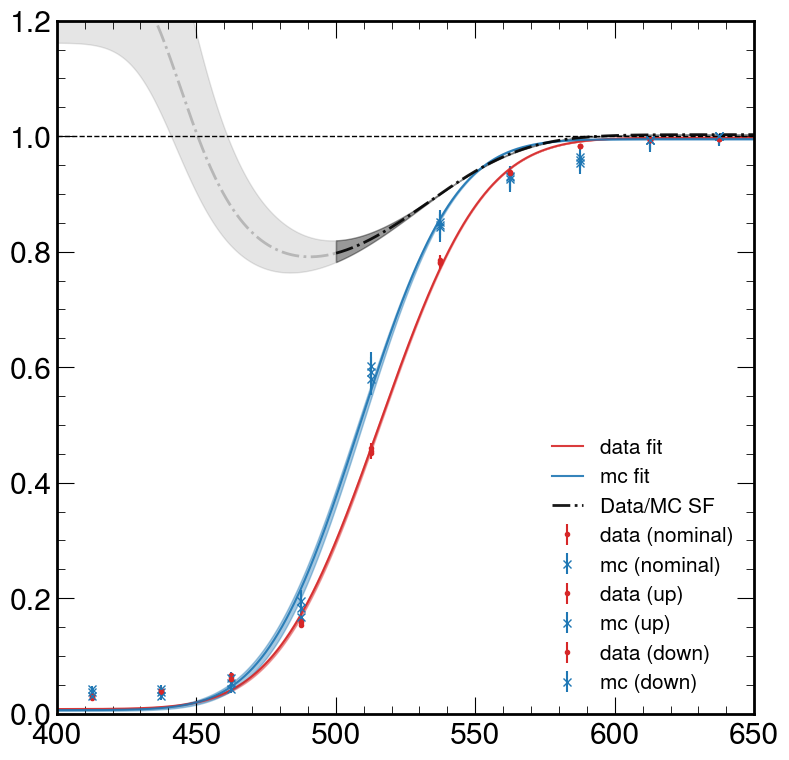

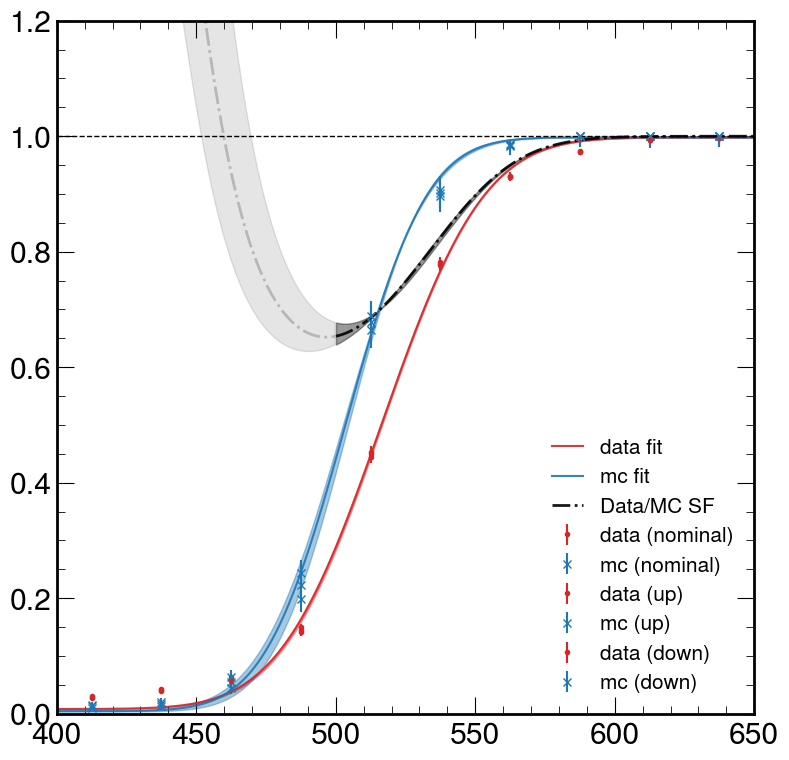

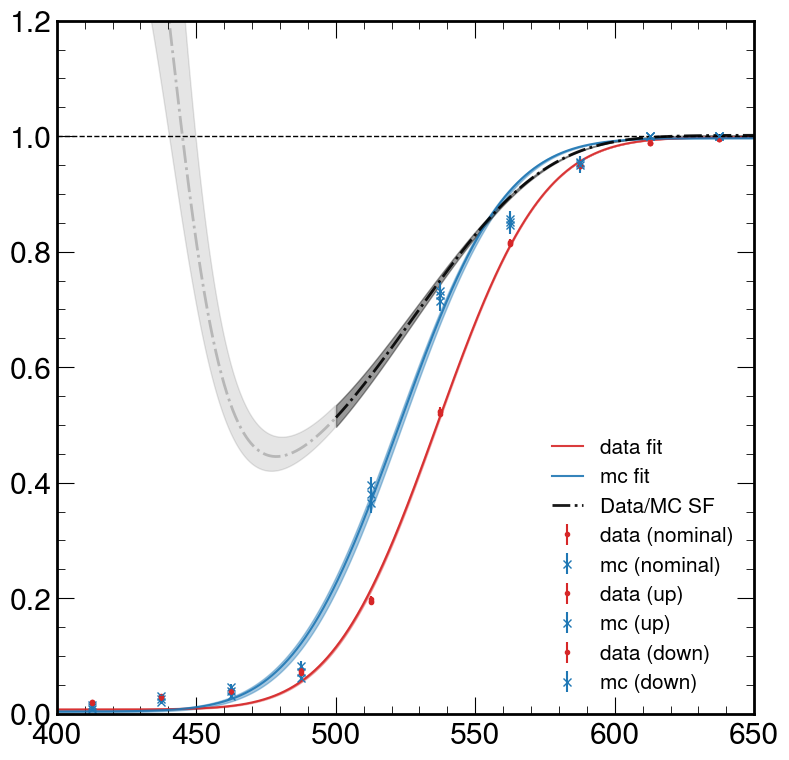

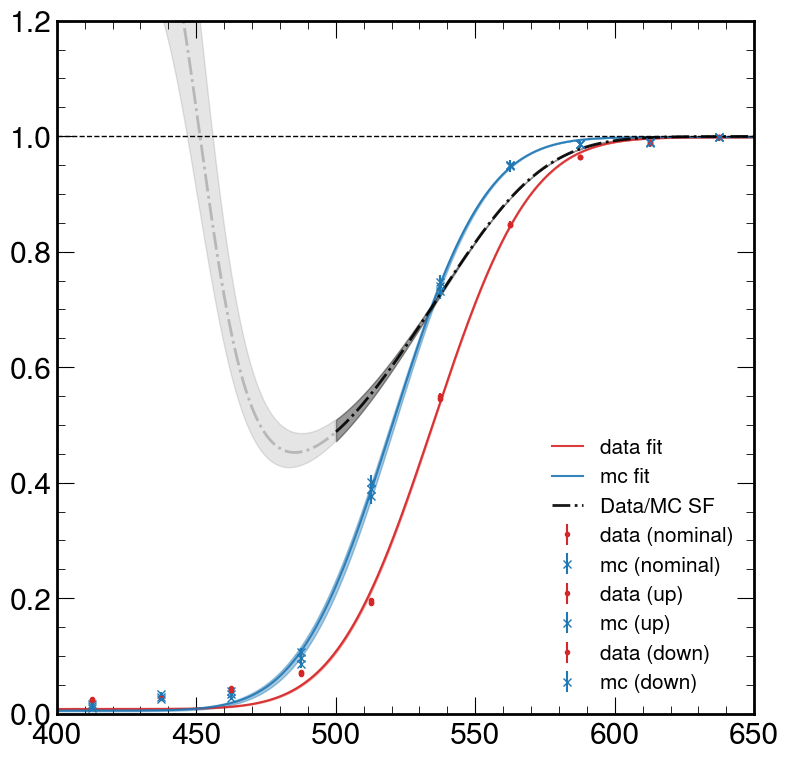

In [423]:
for year in ["UL16preVFP", "UL16postVFP", "UL17", "UL18"]:
    data_f = plot_scalefactor(year)

In [205]:
a = a-np.sqrt(a.variances())


In [206]:
a.sum().value

2573205.7519326895

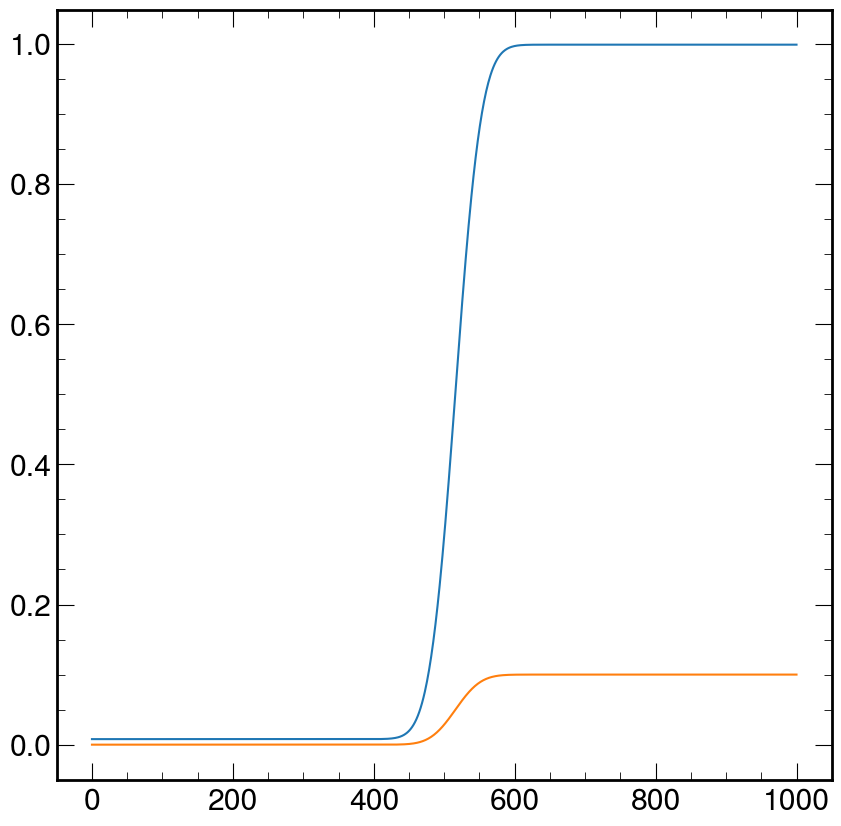

In [297]:
f,ax=plt.subplots()
x=np.linspace(0,1000,1000)

def fit_func(z,a=0.5,b=0.5,c=400,d=0.1):
    return a*erf((z-c)*d)+b
    #"[0]*([1]+0.5*(1-[1])*(1+TMath::Erfc((x-[2])/[3])))"
def robin_func(z,a=0.5,b=0.5,c=400,d=0.1):
    return a*(b+0.5*(1-b)*(1+erf((z-c)/d)))
ax.plot(x,fit_func(x,4.95476418e-01, 5.03387882e-01, 5.15890771e+02, 2.42571195e-02))
ax.plot(x,robin_func(x,1,0, 5.15890771e+02,40))



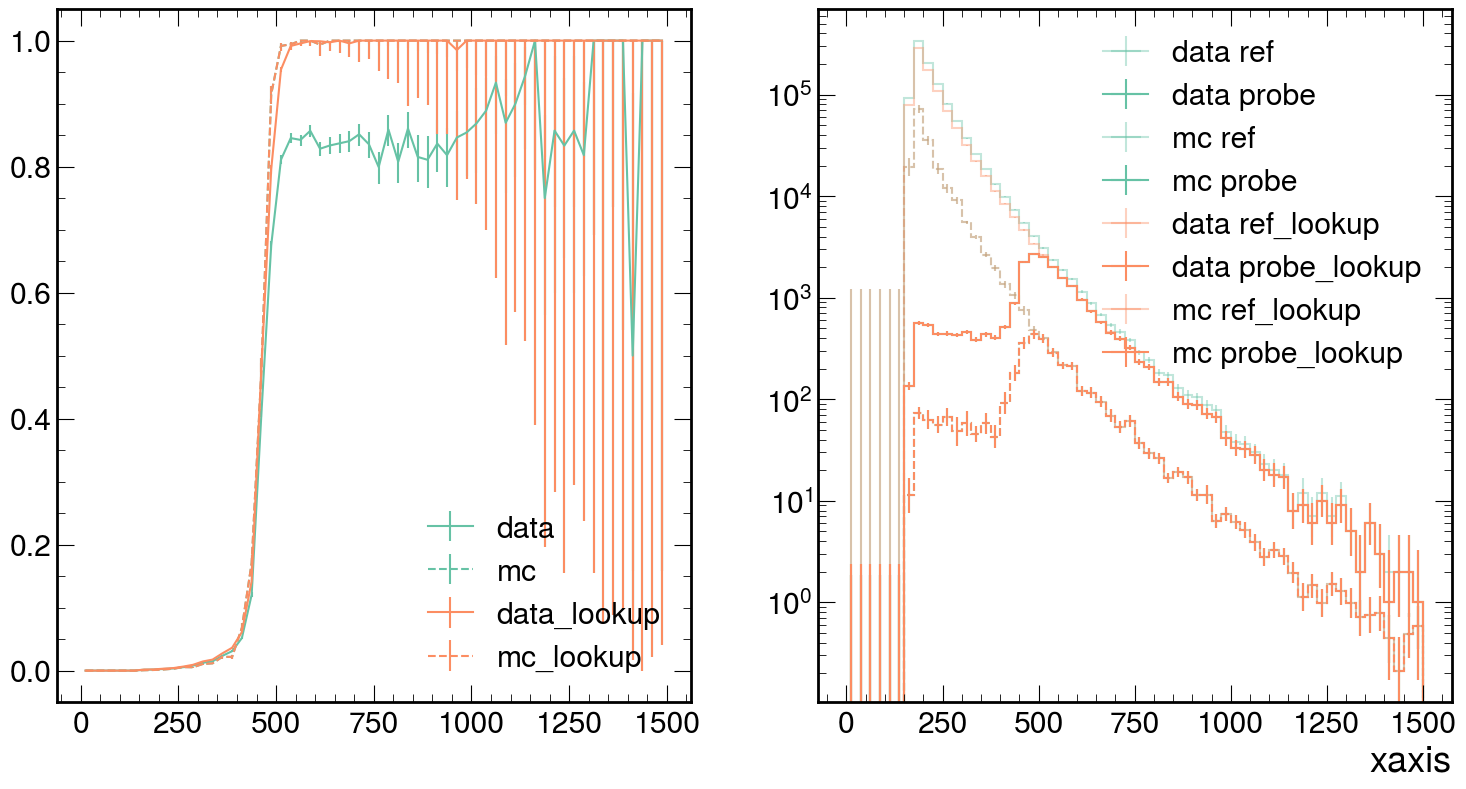

In [39]:
f,(ax,ax1) = plt.subplots(1,2,figsize=(18, 9))
colors = [
"#66c2a5",
"#fc8d62",
"#8da0cb",
"#e78ac3",
"#a6d854",
]
icolor = 0
varname = "AK8_PT"
xlabel="$p_{T,AK8}$"

triggers = {
    "IsoMuonReference":[
        # "AK8PFJET400",
        "AK8PFJet450",
        # "AK8PFJET500",
        # "AK8PFJET550",
        # "AK8PFHT900",
        # "AK8PFHT1050",
    ],
}
prescale_str = ""
lookup_str = "_lookup"
rebin_factor=5
for i, lookup_str in enumerate(["","_lookup"]):
    
    for ref_trig, probe_triggers in triggers.items():
        for probe_trig in probe_triggers:
            eff_data = get_eff_hists(h_data, varname, ref_trig, probe_trig, rebin_factor=rebin_factor, lookup_str=lookup_str, prescale_str=prescale_str)
            eff_mc = get_eff_hists(h_mc, varname, ref_trig, probe_trig, rebin_factor=rebin_factor, lookup_str=lookup_str, prescale_str=prescale_str)
            hep.histplot(eff_data[0],label="data ref"+lookup_str, color=colors[i], alpha=0.4, ax=ax1)
            hep.histplot(eff_data[1],label="data probe"+lookup_str, color=colors[i], alpha=1.0, ax=ax1)
            hep.histplot(eff_mc[0],label="mc ref"+lookup_str, color=colors[i], alpha=0.4, linestyle="--", ax=ax1)
            hep.histplot(eff_mc[1],label="mc probe"+lookup_str, color=colors[i], alpha=1.0, linestyle="--", ax=ax1)
            ax.errorbar(eff_data[0].axes[0].centers,eff_data[2], yerr=eff_data[3], label="data"+lookup_str,color=colors[i])
            ax.errorbar(eff_mc[0].axes[0].centers,eff_mc[2], yerr=eff_mc[3], label="mc"+lookup_str,color=colors[i],linestyle="--")
ax.legend()
ax1.legend()
ax1.set_yscale("log")
        

In [ ]:
import sys
all_paths = list(sys.path)
for p in all_paths:
    if "2.7" in p:
        sys.path.remove(p)
    
import matplotlib.pyplot as plt
import mplhep as hep
import uproot
import numpy as np
import hist
hep.style.use("CMS")
from hist.intervals import ratio_uncertainty
import matplotlib
from collections import namedtuple
from typing import Any, Callable, Iterable, NamedTuple, Union


In [ ]:
hists = uproot.open("../python/flat_templates/templates_UL17_1d.root")
syst="triggersf"
syst="jec"
hists_up=uproot.open(f"../python/flat_templates/templates_UL17_1d_{syst}_up.root")
hists_down=uproot.open(f"../python/flat_templates/templates_UL17_1d_{syst}_down.root")
selection="top"
sample = "TTToSemiLeptonic_mergedW"
region = "passW"
ptbin = "200to300"
# selection="W"
# sample="QCD"
# sample="WJetsMatched"
# region="pass"
# ptbin="400to500"
rebin_factor = 7

h = {
    "nominal":hists[f"{selection}_{sample}__mjet_{ptbin}_{region}"].to_hist()[hist.rebin(rebin_factor)],
    # "up":hists_up[f"{selection}_{sample}__mjet_{ptbin}_{region}"].to_hist()[hist.rebin(rebin_factor)],
    # "down":hists_down[f"{selection}_{sample}__mjet_{ptbin}_{region}"].to_hist()[hist.rebin(rebin_factor)],
    "up":hists[f"{selection}_{sample}__mjet_0_0_all_{ptbin}_{region}__up"].to_hist()[hist.rebin(rebin_factor)],
    "down":hists[f"{selection}_{sample}__mjet_0_0_all_{ptbin}_{region}__down"].to_hist()[hist.rebin(rebin_factor)],
}


In [ ]:

logY=False
year = "UL17"

fig = plt.figure(figsize=(9,9))
grid = fig.add_gridspec(2, 1,hspace=0, height_ratios=[1, 1-9/12])
ax = fig.add_subplot(grid[0])
rax = fig.add_subplot(grid[1], sharex=ax)
plt.setp(ax.get_xticklabels(), visible=False)

hep.histplot(h["nominal"], label = "nominal", ax=ax, color= "black", alpha=0.8)
colors = {"up":"tab:blue","down":"tab:red"}
for direc in ["up", "down"]:
    hep.histplot(h[direc], label = "JES "+("+" if direc=="up" else "-")+ "0.5%", ax=ax, color= colors[direc], alpha=0.8)
    
    sumw_num = h[direc].values()
    sumw_denom = h["nominal"].values()
    rsumw = np.nan_to_num(sumw_num / sumw_denom)
    rsumw_err = np.nan_to_num(ratio_uncertainty(sumw_num, sumw_denom))
    edges = h[direc].axes[0].edges
    # hep.histplot((rsumw, edges), ax=rax, color=colors[direc], alpha=0.8, yerr=rsumw_err)
    hep.histplot((rsumw, edges), ax=rax, color=colors[direc], alpha=0.8, yerr=False)
    #plot_ratio_array_my(h[direc], rsumw, rsumw_err, rax, color=colors[direc], alpha=0.8)

min_x, max_x = (30,150)
# min_x, max_x = (70,80)
rax.plot([min_x,max_x], [1,1], "k--", alpha=0.8)
ax.set_ylabel(r"$\Delta N / N$")
rax.set_xlabel(r"$m_{SD}$")
rax.set_xlim(min_x, max_x)
ax.legend()
y_half = ax.get_ylim()[1]/2
if logY:
    ax.set_yscale("log")        
    ymin,ymax = np.log10(ax.get_ylim())
    y_half = 10**((ymin+ymax)/2)
# hep.label.exp_label(llabel='Private Work (CMS simulation)',year=year,ax=ax,fontsize=20)
# hep.label.exp_label(llabel='Private Work (CMS simulation)',year=year,ax=ax,fontsize=20)
hep.cms.label("Preliminary", ax=ax,year="UL17", fontsize=20)
rax.set_ylim(0.8,1.2)
rax.set_ylabel(r"$\frac{var}{nominal}$", loc="center")
y_max_old = ax.get_ylim()[1]
ax.set_ylim(0.1,y_max_old/(2./3.))
ax.text(40,0.9*ax.get_ylim()[1],r"matched $W(qq)$ jets", fontsize=18)
ax.text(40,0.8*ax.get_ylim()[1],r"$200~GeV \leq p_{T,AK8} < 300~GeV$", fontsize=18)
fig.savefig("UL17_ttbar_matchedW_200to300_msdvar_comparison.pdf", bbox_inches="tight")

In [58]:
from coffea.util import load
from copy import deepcopy

In [ ]:
regions_signal_topjets = {
    "ttbar":{
        "pass":["ttbar_TTToSemiLeptonic_mergedTop"],
        "passW":["ttbar_TTToSemiLeptonic_mergedTop"],
        "fail":["ttbar_TTToSemiLeptonic_mergedTop","ttbar_TTToSemiLeptonic_mergedW"],        
    },
}
regions_signal_Wjets = {
    "ttbar":{
        "pass":["ttbar_TTToSemiLeptonic_mergedW"],
        "passW":["ttbar_TTToSemiLeptonic_mergedW"],
        "fail":["ttbar_TTToSemiLeptonic_mergedTop","ttbar_TTToSemiLeptonic_mergedW"],        
    },
    "vjets":{
        "pass":["vjets_WJetsMatched"],
        "fail":["vjets_WJetsMatched"],
    }
}

In [ ]:
def tagger_eff(year, tagger_suffix,regions_signal):
    fname = f"../python/coffea_hists/templates_{year}{tagger_suffix}.coffea"
    hists = load(fname)
    hist_id = dict(pt=sum,jecAppliedOn="pt&mJ",abs_eta_regions=sum)
    effs = {}
    for selection,regions in regions_signal.items():
        effs[selection]={}
        for region, samples in regions.items():
            hist_incl = hists[f"{selection}_mjet_inclusive"][hist_id]
            hist = hists[f"{selection}_mjet_{region}"][hist_id]
            backgrounds = list(deepcopy(hist.axes["dataset"]))
            backgrounds.remove(f"{selection}_Data")
            for sample in samples:
                backgrounds.remove(sample)
            N_total_signal = hist_incl[{"dataset":samples}].sum().value
            N_total_background = hist_incl[{"dataset":backgrounds}].sum().value
            N_signal = hist[{"dataset":samples}].sum().value
            N_background = hist[{"dataset":backgrounds}].sum().value
            # print(f"{region} -> signal eff: {N_signal/N_total_signal*100:.2f}% mistag rate: {N_background/N_total_background*100:.2f}%")
            effs[selection][region]={"signal_eff":N_signal/N_total_signal*100,"mistag_rate":N_background/N_total_background*100}
    return effs

In [ ]:
taggers = ["substructure", "particlenet"]
tagger_suffix = {"substructure":"", "particlenet":"_particlenet"}
years = ["UL16preVFP", "UL16postVFP", "UL17", "UL18"]
effs = {tagger:{} for tagger in taggers}
for tagger in taggers:
    for year in years:
        effs[tagger][year]=tagger_eff(year, tagger_suffix[tagger])

In [ ]:
for tagger in taggers:
    print(tagger)
    for sel,regions in regions_signal.items():
        print(sel)
        for region in regions:
            signaleff_year = sum([effs[tagger][year][sel][region]["signal_eff"] for year in years])/len(years)
            mistag_year = sum([effs[tagger][year][sel][region]["mistag_rate"] for year in years])/len(years)
            print(f"{region} signal eff: {signaleff_year:.2f}% misstag: {mistag_year:.2f}%")
            
print("\n\nSeparate years")
# for tagger in taggers:
#     for year in years:
#         print(tagger, year)
#         for sel, regions in effs[tagger][year].items():
#             print(sel)
#             for region, rates in regions.items():
#                 print(f"{region} signal eff: {rates['signal_eff']:.2f}% misstag: {rates['mistag_rate']:.2f}%")